In [ ]:
!gdown https://drive.google.com/uc?id=1kCQxmbJzZPyoyt10H4QAqAUZFhqNZuZG
!unzip YouTubeFaces-subset.zip
!mv subset/* ./
!ls -l

Downloading...
From: https://drive.google.com/uc?id=1kCQxmbJzZPyoyt10H4QAqAUZFhqNZuZG
To: /content/YouTubeFaces-subset.zip
100% 496M/496M [00:04<00:00, 113MB/s]
Archive:  YouTubeFaces-subset.zip
   creating: subset/
 extracting: subset/Fred_Eckhard_1.npz  
 extracting: subset/Kevin_Spacey_3.npz  
 extracting: subset/Amanda_Beard_2.npz  
 extracting: subset/Barbara_Brezigar_2.npz  
 extracting: subset/Daniel_Kurtzer_2.npz  
 extracting: subset/Kevin_Spacey_2.npz  
 extracting: subset/Fred_Eckhard_2.npz  
 extracting: subset/Lauren_Hutton_3.npz  
 extracting: subset/Amanda_Beard_0.npz  
 extracting: subset/Daniel_Kurtzer_1.npz  
 extracting: subset/Alison_Lohman_5.npz  
 extracting: subset/Andrew_Bernard_2.npz  
 extracting: subset/Robert_F_Kennedy_Jr_0.npz  
 extracting: subset/Daniel_Kurtzer_3.npz  
 extracting: subset/Daniel_Kurtzer_0.npz  
 extracting: subset/Robert_F_Kennedy_Jr_4.npz  
 extracting: subset/Elizabeth_Berkeley_2.npz  
 extracting: subset/Amanda_Beard_4.npz  
 extractin

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
df = pd.read_csv('youtube_faces_with_keypoints_full.csv')
df

,videoID,personName,imageHeight,imageWidth,videoDuration,averageFaceSize,numVideosForPerson
0,Alison_Lohman_0,Alison_Lohman,228.0,213.0,240.0,90.150000,6.0
1,Alison_Lohman_1,Alison_Lohman,248.0,201.0,79.0,108.417722,6.0
2,Alison_Lohman_2,Alison_Lohman,335.0,308.0,136.0,122.161765,6.0
3,Alison_Lohman_3,Alison_Lohman,151.0,110.0,53.0,58.000000,6.0
4,Alison_Lohman_4,Alison_Lohman,236.0,228.0,147.0,91.680272,6.0
5,Alison_Lohman_5,Alison_Lohman,227.0,179.0,68.0,105.647059,6.0
6,Kevin_Spacey_0,Kevin_Spacey,196.0,264.0,91.0,99.912088,6.0
7,Kevin_Spacey_1,Kevin_Spacey,260.0,217.0,59.0,120.186441,6.0
8,Kevin_Spacey_2,Kevin_Spacey,186.0,175.0,71.0,86.746479,6.0
9,Kevin_Spacey_3,Kevin_Spacey,100.0,89.0,99.0,44.636364,6.0


In [ ]:
import torch
import torchvision

In [ ]:
import PIL

def normalize_transform(img):
  img = PIL.Image.fromarray(img)
  transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.functional.autocontrast,
  ])
  img = transform(img)
  return img

In [ ]:
import bisect
import random

class YouTubeFacesDataset(torch.utils.data.Dataset):
  def __init__(self, df, folder='.', transform=normalize_transform):
    self.data = {}
    for p in tqdm(df['personName'].unique(), desc='Loading data'):
      self.data[p] = []
      for fn in df[df['personName'] == p]['videoID']:
        d = np.load(f'{folder}/{fn}.npz')
        imgs = d['colorImages']
        imgs = np.moveaxis(imgs, -1, 0)
        imgs_l = list(imgs)
        if transform:
          imgs_l = [transform(img) for img in imgs_l]
        self.data[p] += imgs_l
    self.persons = list(self.data.keys())
    self.neg_data = {}
    for p in self.persons:
      self.neg_data[p] = []
      for p_neg in self.persons:
        if p_neg == p:
          continue
        self.neg_data[p] += self.data[p_neg]
    self.pers_item_counter = []
    for p in self.persons:
      # random positive set
      positive_set_len = 1
      self.pers_item_counter += [positive_set_len * len(self.neg_data[p])]
      if len(self.pers_item_counter) > 1:
        self.pers_item_counter[-1] += self.pers_item_counter[-2]
  
  def __len__(self):
    # random positive set
    return sum(len(x) for x in self.neg_data.values())
  
  def __getitem__(self, index):
    p_i = bisect.bisect_left(self.pers_item_counter, index + 1)
    assert p_i >= 0
    assert p_i < len(self.persons)
    p = self.persons[p_i]
    anchor_i = (self.pers_item_counter[p_i] - index) % len(self.data[p])
    assert anchor_i >= 0
    assert anchor_i < len(self.data[p])
    positive_i = random.randint(0, len(self.data[p]) - 1)
    while positive_i == anchor_i:
      positive_i = random.randint(0, len(self.data[p]) - 1)
    assert positive_i >= 0
    assert positive_i < len(self.data[p])
    # the order does not matter
    negative_i = self.pers_item_counter[p_i] - index - 1
    assert negative_i >= 0, f'p_i={p_i}, index={index}, pers={self.persons[p_i]}, counter={self.pers_item_counter[p_i]}'
    assert negative_i < len(self.neg_data[p])
    return self.data[p][anchor_i], self.data[p][positive_i], self.neg_data[p][negative_i]

In [ ]:
test = YouTubeFacesDataset(df)
len(test), len(test[42]), len(test[0]), len(test[len(test)-1])

Loading data: 100%|██████████| 10/10 [00:48<00:00,  4.83s/it]


(62415, 3, 3, 3)

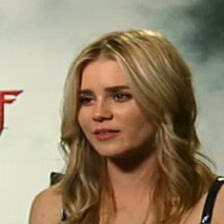

In [ ]:
to_pil_transform = torchvision.transforms.ToPILImage()
to_pil_transform(test[42][1])

In [ ]:
import pickle

def save(obj, fn):
  with open(fn, 'wb') as f:
    pickle.dump(obj, f)

def load(fn):
  with open(fn, 'rb') as f:
    return pickle.load(f)

In [ ]:
save(test, 'test.pkl')

In [ ]:
!ls -l test.pkl

-rw-r--r-- 1 root root 4178180183 Aug 24 11:28 test.pkl


In [ ]:
test = load('test.pkl')

In [ ]:
!gzip test.pkl
!ls -l test.pkl*

-rw-r--r-- 1 root root 878683379 Aug 24 11:28 test.pkl.gz


In [ ]:
save(test.data, 'data.pkl')

In [ ]:
!ls -l data.pkl

-rw-r--r-- 1 root root 4177875765 Aug 24 11:42 data.pkl
